In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression, Ridge

sns.set()

In [9]:
# Leemos el dataset
california_housing = fetch_california_housing()

# Y obtenemos los atributos y target
X = california_housing.data
y = california_housing.target

# Transformamos en Pandas
X = pd.DataFrame(X, columns=california_housing['feature_names'])
y = pd.Series(y, name=california_housing['target_names'][0])

# Unimos a X e y, esto ayuda a la parte de la gráfica del mapa de calor de correlación
df_california = pd.concat([X, y], axis=1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size=0.3, random_state=42)

In [11]:
# Escalemos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lo transformemos en DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=california_housing['feature_names'])
X_test_scaled = pd.DataFrame(X_test_scaled, columns=california_housing['feature_names'])

In [12]:
# Creamos un modelo
alpha = 1.0
ridge_model = Ridge(alpha=alpha)

# Este la forma que se implementa en scikit-learn
cv = cross_val_score(ridge_model, X_train_scaled, y=y_train, scoring="neg_mean_squared_error", cv=5, n_jobs=-1)

# Este calculo nos devuelve el valor de MSE para cada una de los folds
# cv


In [13]:
# Podemos obtener el valor medio y desvio estandar de cada caso:
print(f"La media del MSE en 5-fold CV para la regresión Ridge con alpha={alpha} es {(-1)*cv.mean()}")
print(f"El desvío estándar del MSE en 5-fold CV para la regresión Ridge con alpha={alpha} es {cv.std()}")

La media del MSE en 5-fold CV para la regresión Ridge con alpha=1.0 es 0.5268231539349313
El desvío estándar del MSE en 5-fold CV para la regresión Ridge con alpha=1.0 es 0.018742809748334553


## 3. Calcular la regresión lineal usando todos los atributos. Con el set de entrenamiento, calcular la varianza total del modelo y la que es explicada con el modelo. ¿El modelo está capturando el comportamiento del target? Expanda su respuesta.

In [38]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predicciones en el conjunto de entrenamiento
y_train_pred = lin_reg.predict(X_train)


In [52]:
S_e = np.var(y_train-y_train_pred)
S_t = np.var(y_train_pred)
S_r = S_t - S_e
print('S_e=', f'{S_e:.3g}')
print('S_t=', f'{S_t:.3g}')
print('S_r=', f'{S_r:.3g}')
# S_r, S_e, S_t

S_e= 0.523
S_t= 0.816
S_r= 0.293


## 4.  Calcular las métricas de MSE, MAE y R2 del set de evaluación.

In [61]:
y_test_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
print(r2_score)
print('mse=', f'{mse:.3g}')
print('mae=', f'{mae:.3g}')
print('r2=', f'{r2:.3g}')

<function r2_score at 0x7ed254360430>
mse= 0.531
mae= 0.527
r2= 0.596


## 5.   Crear una regresión de Ridge. Usando una validación cruzada de 5-folds y usando como métrica el MSE, calcular el mejor valor de α, buscando entre [0, 12.5]. Graficar el valor de MSE versus α

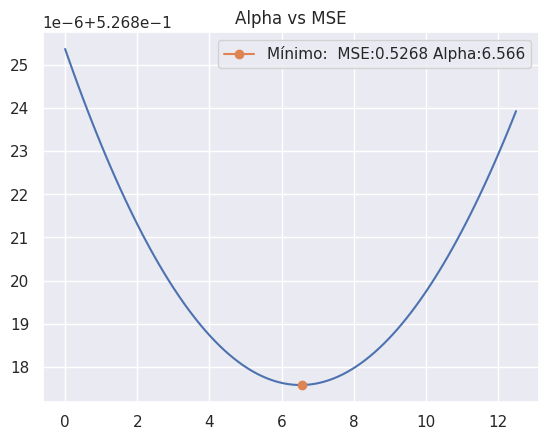

In [29]:
alpha_values = np.linspace(0, 12.5, 100)
MSE = np.array([])
for alpha in alpha_values:
    ridge_model = Ridge(alpha=alpha)
    cv = cross_val_score(ridge_model, X_train_scaled, y=y_train, scoring="neg_mean_squared_error", cv=5, n_jobs=-1)
    mse = -cv.mean()
    MSE = np.append(MSE, mse)

idx = np.argmin(MSE)
best_alpha = alpha_values[idx]
best_mse = MSE[idx]
plt.plot(alpha_values, MSE)
plt.title('Alpha vs MSE')
plt.plot(best_alpha, best_mse, label=f'Mínimo:  MSE:{best_mse:.4g} Alpha:{best_alpha:.4g}', marker='o')
plt.legend()


## 6.   Comparar, entre la regresión lineal y la mejor regresión de Ridge, los resultados obtenidos en el set de evaluación. ¿Cuál da mejores resultados (usando MSE y MAE)? Conjeturar por qué el mejor modelo mejora. ¿Qué error puede haberse reducido?



In [72]:
df = pd.DataFrame()
for name, model in zip(['Ridge', 'Regresión Lineal'],[Ridge(alpha=best_alpha), LinearRegression()]):
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_test_pred)
    mae = mean_absolute_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    row = {
        'Model': name,
        'MSE': mse,
        'MAE': mae,
        # 'R2': r2
    }
    
    df = pd.concat([df, pd.DataFrame([row])], ignore_index=True)
df

,Model,MSE,MAE
0,Ridge,0.530169,0.527302
1,Regresión Lineal,0.530568,0.527247
